In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.pandas.set_option('display.max_columns', None)

In [6]:
df = pd.read_csv('Heart Disease data.csv')

In [7]:
df.shape

(1025, 14)

In [8]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [9]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [10]:
df.isnull().sum()>0

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [11]:
def heart_diseases(value):
    '''function to convert numerical feature to categorical feature'''
    if value == 0:
        return 'absence'
    else:
        return 'presence'

In [12]:
df['heart_disease'] = df['target'].apply(heart_diseases)

In [13]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,absence
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,absence
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,absence
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,absence
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,absence
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1,presence
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0,absence
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0,absence
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1,presence


In [14]:
hd = df.groupby('heart_disease')['target'].count()
hd

heart_disease
absence     499
presence    526
Name: target, dtype: int64

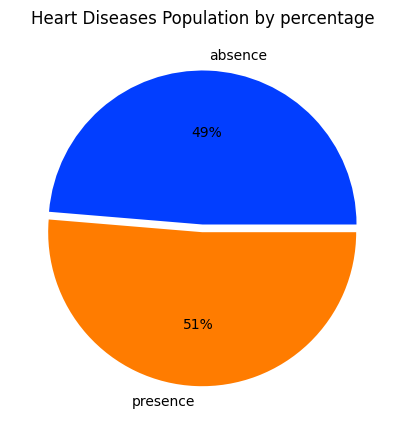

In [15]:
plt.figure(figsize=(5,5))
clrs= sns.color_palette('bright')
explode=[0, 0.05]
plt.pie(hd, labels=['absence', 'presence'], autopct='%0.0f%%', colors=clrs, explode = explode)
plt.title('Heart Diseases Population by percentage')
plt.show()

C:\Users\avira\AppData\Local\Temp\ipykernel_11824\3545742913.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age', data=df, palette='bright')


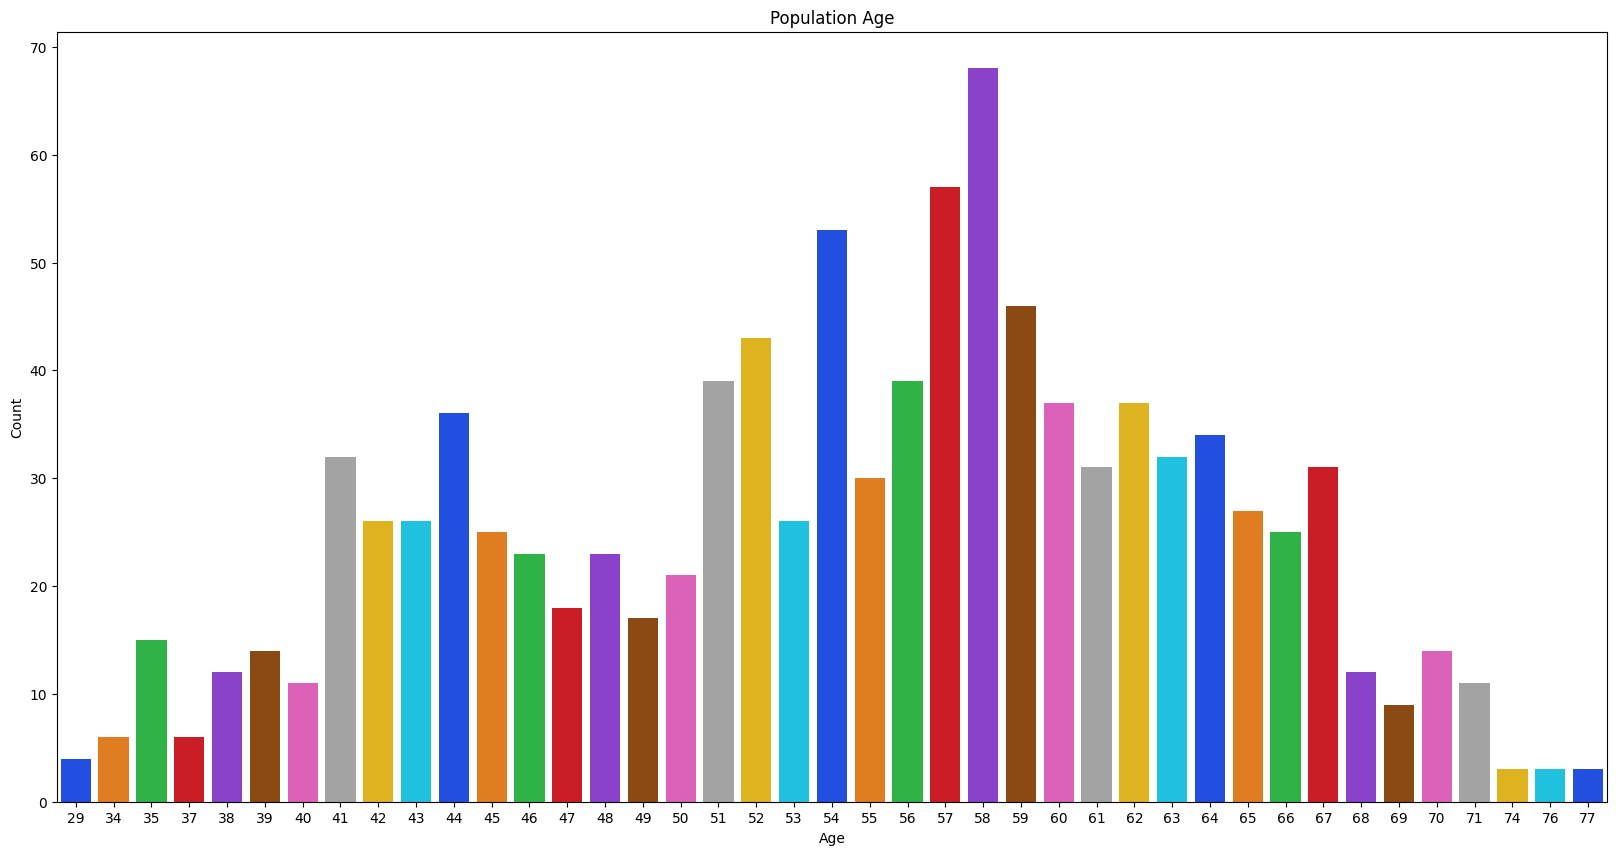

In [16]:
plt.figure(figsize=(20,10))
plt.title('Population Age')
sns.countplot(x='age', data=df, palette='bright')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [17]:
min_age = df['age'].min()
max_age = df['age'].max()
mean_age = df['age'].mean()
print(f"The minimum age is {min_age}")
print(f"The maximum age is {max_age}")
print(f"The average age is {np.round(mean_age, 2)}")


The minimum age is 29
The maximum age is 77
The average age is 54.43


In [18]:
young_age = df[(df['age']>=29) & (df['age']<40)]
middle_age = df[(df['age']>=40) & (df['age']<55)]
old_age=df[(df['age']>55)]
print(f"Number of young age people = {len(young_age)}")
print(f"Number of middle age people = {len(middle_age)}")
print(f"Number of old age people = {len(old_age)}")

Number of young age people = 57
Number of middle age people = 419
Number of old age people = 519


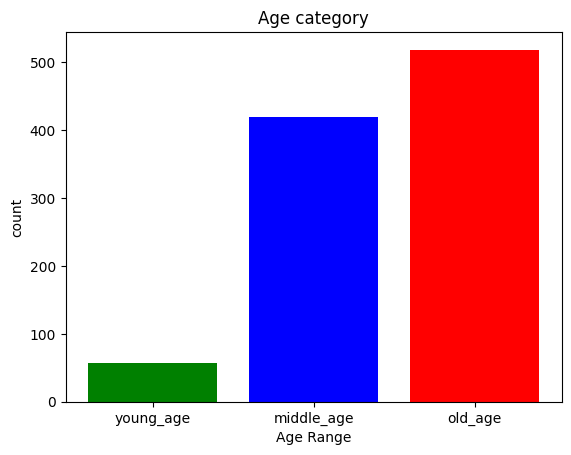

In [19]:
cat = ['young_age', 'middle_age', 'old_age']
_count = [len(young_age), len(middle_age), len(old_age)]
plt.bar(cat, _count, color=['green', 'blue', 'red'])
plt.title('Age category')
plt.xlabel('Age Range')
plt.ylabel('count')
plt.show()

In [20]:
def age_range(row):
    '''converting population age into range of age'''
    if row>=29 and row<40:
        return 'youngAge'
    elif row>=40 and row<55:
        return 'middleAge'
    else:
        return 'oldAge'

In [21]:
df['ageRange'] = df['age'].apply(age_range)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,ageRange
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,absence,middleAge
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,absence,middleAge
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,absence,oldAge
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,absence,oldAge
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,absence,oldAge


In [22]:
def _sex(row):
    if row==1:
        return 'male'
    else:
        return 'female'

In [23]:
df['gender'] = df['sex'].apply(_sex)
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,heart_disease,ageRange,gender
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0,absence,middleAge,male
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0,absence,middleAge,male
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0,absence,oldAge,male
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0,absence,oldAge,male
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0,absence,oldAge,female


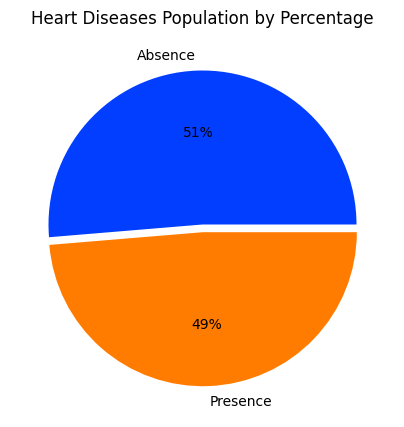

In [24]:
# Pie Chart of Heart Disease Presence by Percentage
plt.figure(figsize=(5, 5))
clrs = sns.color_palette('bright')
explode = [0, 0.05]
hd_counts = df['target'].value_counts()
plt.pie(hd_counts, labels=['Absence', 'Presence'], autopct='%0.0f%%', colors=clrs, explode=explode)
plt.title('Heart Diseases Population by Percentage')
plt.show()

C:\Users\avira\AppData\Local\Temp\ipykernel_11824\3562713518.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='age', data=df, palette='bright')


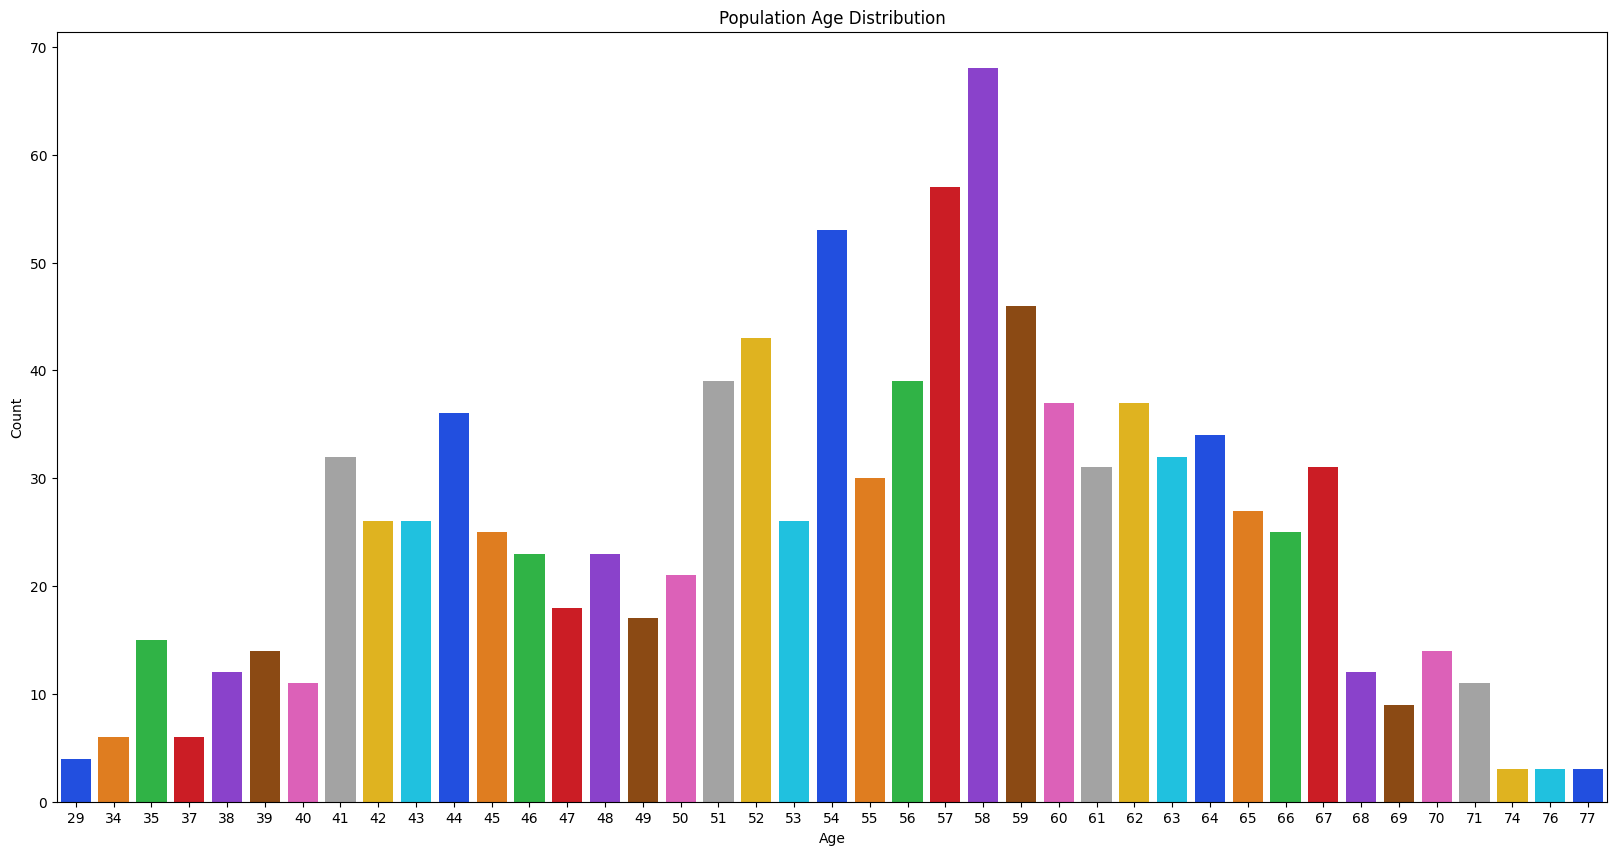

In [25]:
# Population Age Distribution
plt.figure(figsize=(20, 10))
plt.title('Population Age Distribution')
sns.countplot(x='age', data=df, palette='bright')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [26]:
# Age Range Analysis
min_age = df['age'].min()
max_age = df['age'].max()
mean_age = df['age'].mean()
print(f"The minimum age is {min_age}")
print(f"The maximum age is {max_age}")
print(f"The average age is {np.round(mean_age, 2)}")

young_age = df[(df['age'] >= 29) & (df['age'] < 40)]
middle_age = df[(df['age'] >= 40) & (df['age'] < 55)]
old_age = df[(df['age'] > 55)]
print(f"Number of young age people = {len(young_age)}")
print(f"Number of middle age people = {len(middle_age)}")
print(f"Number of old age people = {len(old_age)}")

The minimum age is 29
The maximum age is 77
The average age is 54.43
Number of young age people = 57
Number of middle age people = 419
Number of old age people = 519


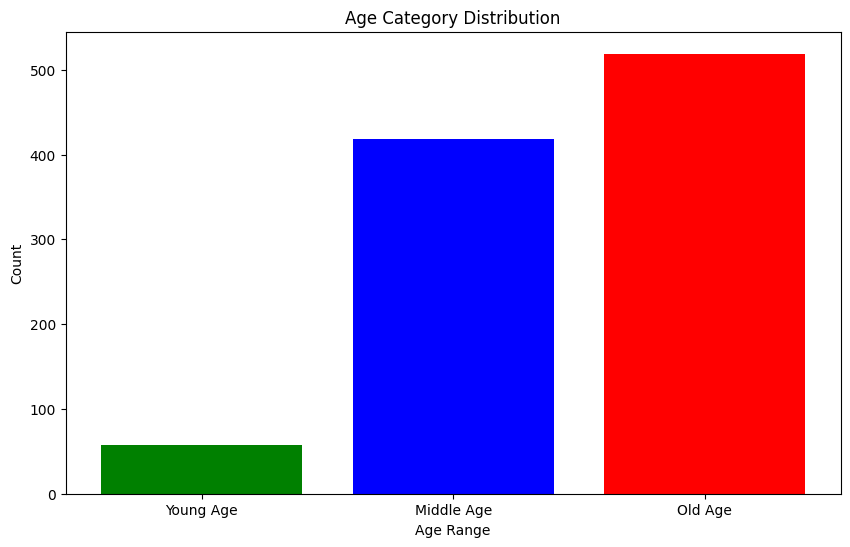

In [28]:
# Plotting Age Category
age_categories = ['Young Age', 'Middle Age', 'Old Age']
age_counts = [len(young_age), len(middle_age), len(old_age)]
plt.figure(figsize=(10, 6))
plt.bar(age_categories, age_counts, color=['green', 'blue', 'red'])
plt.title('Age Category Distribution')
plt.xlabel('Age Range')
plt.ylabel('Count')
plt.show()

C:\Users\avira\AppData\Local\Temp\ipykernel_11824\1733095005.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sex', data=df, palette='pastel')


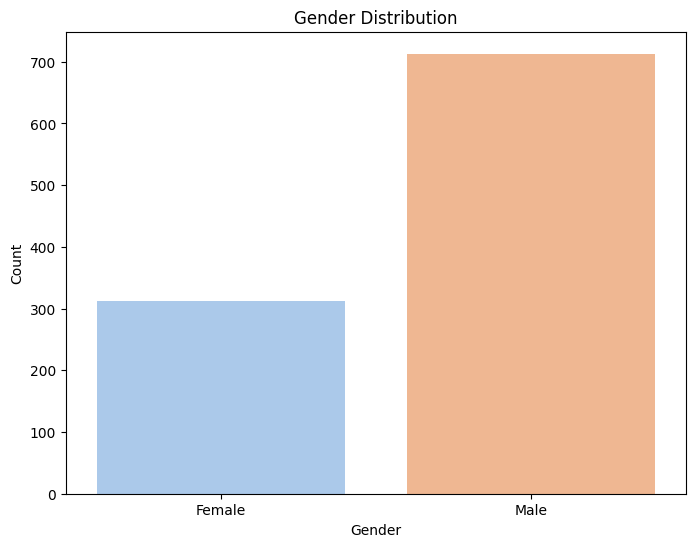

In [29]:
# Gender Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df, palette='pastel')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.show()

In [30]:
# Calculate the number and percentage of males and females
gender_counts = df['sex'].value_counts()
total_count = len(df)
male_percentage = (gender_counts[1] / total_count) * 100
female_percentage = (gender_counts[0] / total_count) * 100
print(f"Number of Males: {gender_counts[1]}, Percentage: {male_percentage:.2f}%")
print(f"Number of Females: {gender_counts[0]}, Percentage: {female_percentage:.2f}%")

Number of Males: 713, Percentage: 69.56%
Number of Females: 312, Percentage: 30.44%


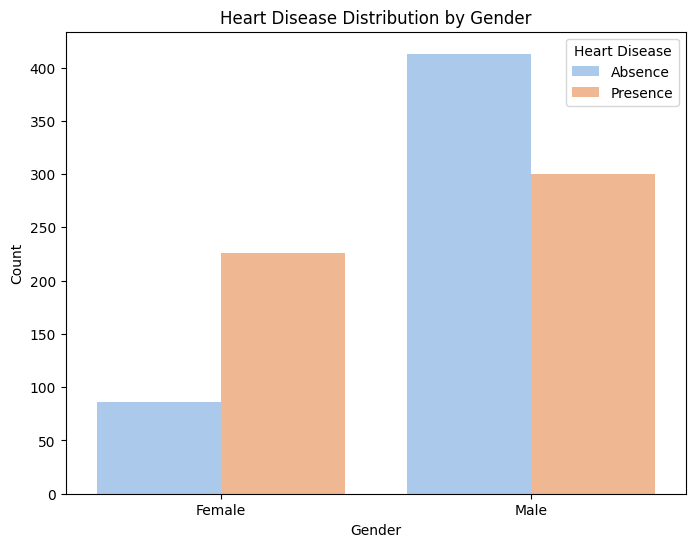

In [31]:
# Heart Disease Distribution by Gender
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', hue='target', data=df, palette='pastel')
plt.title('Heart Disease Distribution by Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'])
plt.legend(title='Heart Disease', labels=['Absence', 'Presence'])
plt.show()

In [32]:
# Cholesterol Analysis
mean_chol = df['chol'].mean()
median_chol = df['chol'].median()
min_chol = df['chol'].min()
max_chol = df['chol'].max()
print(f"Mean Cholesterol: {mean_chol}")
print(f"Median Cholesterol: {median_chol}")
print(f"Minimum Cholesterol: {min_chol}")
print(f"Maximum Cholesterol: {max_chol}")

Mean Cholesterol: 246.0
Median Cholesterol: 240.0
Minimum Cholesterol: 126
Maximum Cholesterol: 564


C:\Users\avira\AppData\Local\Temp\ipykernel_11824\3564663272.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='chol', data=df, palette='pastel')


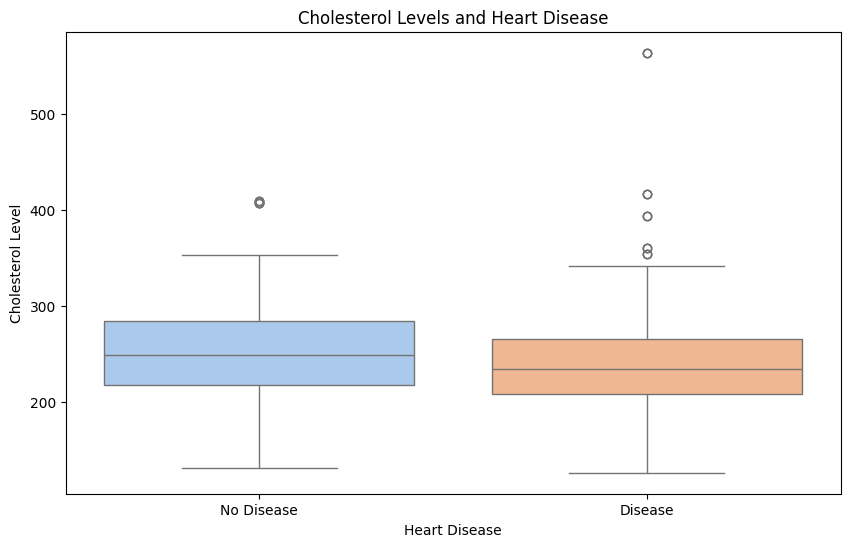

In [33]:
# Compare cholesterol levels between individuals with and without heart disease
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=df, palette='pastel')
plt.title('Cholesterol Levels and Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Cholesterol Level')
plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'])
plt.show()

C:\Users\avira\AppData\Local\Temp\ipykernel_11824\3003305362.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='cp', data=df, palette='pastel')


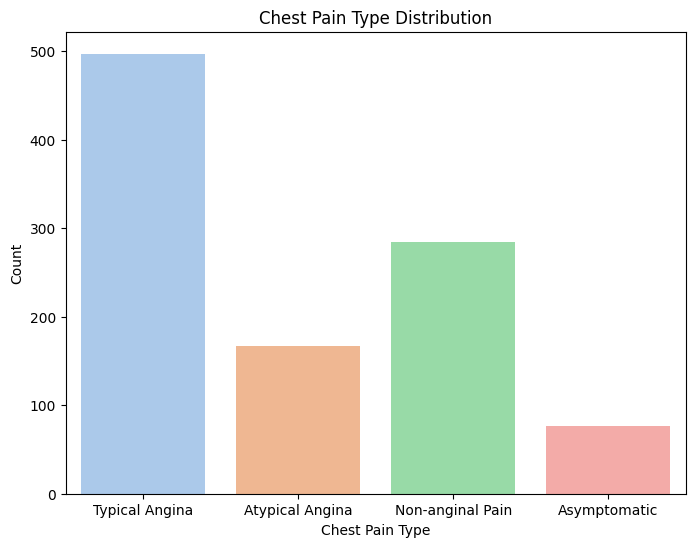

In [34]:
# Chest Pain Type Distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='cp', data=df, palette='pastel')
plt.title('Chest Pain Type Distribution')
plt.xlabel('Chest Pain Type')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Typical Angina', 'Atypical Angina', 'Non-anginal Pain', 'Asymptomatic'])
plt.show()

In [35]:
# Calculate the percentage of each chest pain type
cp_counts = df['cp'].value_counts()
total_count = len(df)
cp_percentages = (cp_counts / total_count) * 100
for cp_type, percentage in cp_percentages.items():
    print(f"Chest Pain Type: {cp_type}, Percentage: {percentage:.2f}%")

Chest Pain Type: 0, Percentage: 48.49%
Chest Pain Type: 2, Percentage: 27.71%
Chest Pain Type: 1, Percentage: 16.29%
Chest Pain Type: 3, Percentage: 7.51%


In [36]:
# Resting Blood Pressure Analysis
mean_rest_bp = df['trestbps'].mean()
median_rest_bp = df['trestbps'].median()
min_rest_bp = df['trestbps'].min()
max_rest_bp = df['trestbps'].max()
print(f"Mean Resting Blood Pressure: {mean_rest_bp}")
print(f"Median Resting Blood Pressure: {median_rest_bp}")
print(f"Minimum Resting Blood Pressure: {min_rest_bp}")
print(f"Maximum Resting Blood Pressure: {max_rest_bp}")

Mean Resting Blood Pressure: 131.61170731707318
Median Resting Blood Pressure: 130.0
Minimum Resting Blood Pressure: 94
Maximum Resting Blood Pressure: 200


C:\Users\avira\AppData\Local\Temp\ipykernel_11824\2778315946.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='trestbps', data=df, palette='pastel')


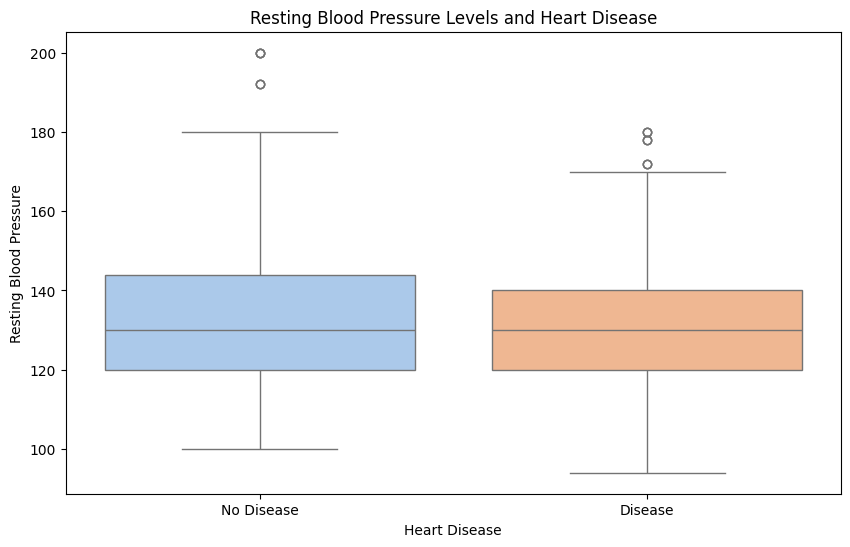

In [37]:
# Compare resting blood pressure levels between individuals with and without heart disease
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='trestbps', data=df, palette='pastel')
plt.title('Resting Blood Pressure Levels and Heart Disease')
plt.xlabel('Heart Disease')
plt.ylabel('Resting Blood Pressure')
plt.xticks(ticks=[0, 1], labels=['No Disease', 'Disease'])
plt.show()

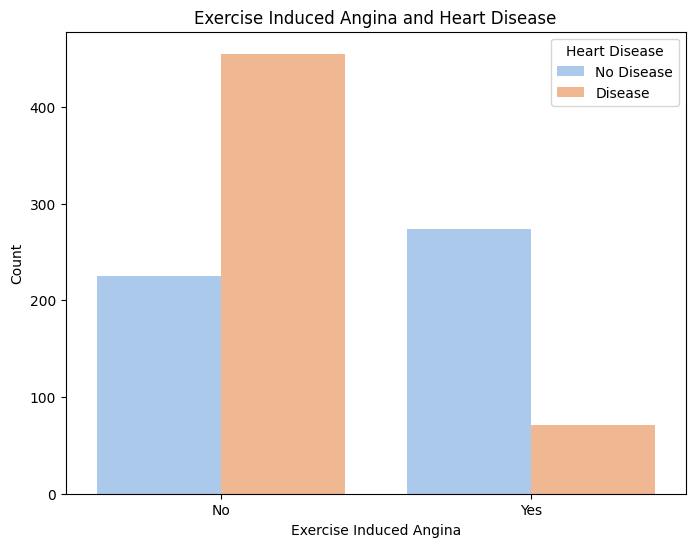

In [38]:
# Exercise Induced Angina Analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='exang', hue='target', data=df, palette='pastel')
plt.title('Exercise Induced Angina and Heart Disease')
plt.xlabel('Exercise Induced Angina')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=['No', 'Yes'])
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()

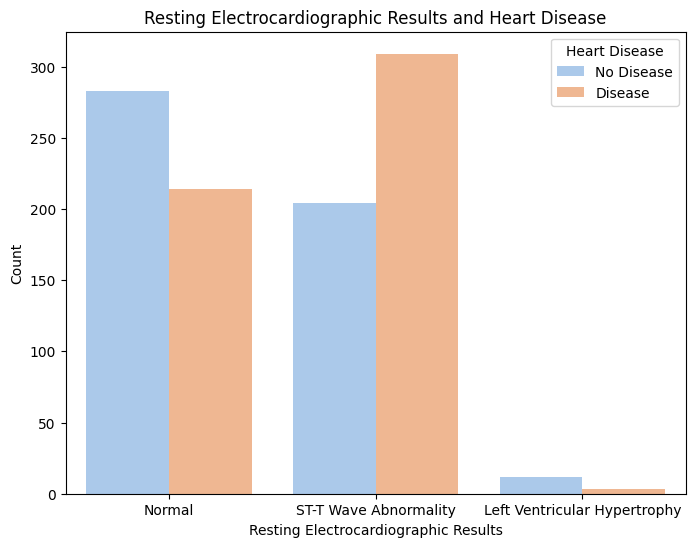

In [39]:
# Resting Electrocardiographic Results Analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='restecg', hue='target', data=df, palette='pastel')
plt.title('Resting Electrocardiographic Results and Heart Disease')
plt.xlabel('Resting Electrocardiographic Results')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1, 2], labels=['Normal', 'ST-T Wave Abnormality', 'Left Ventricular Hypertrophy'])
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()

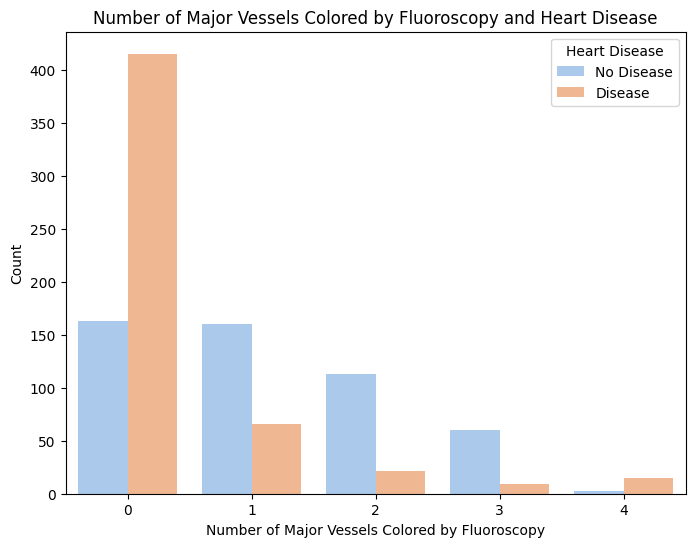

In [40]:
# Number of Major Vessels Colored by Fluoroscopy Analysis
plt.figure(figsize=(8, 6))
sns.countplot(x='ca', hue='target', data=df, palette='pastel')
plt.title('Number of Major Vessels Colored by Fluoroscopy and Heart Disease')
plt.xlabel('Number of Major Vessels Colored by Fluoroscopy')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No Disease', 'Disease'])
plt.show()